# 1. d) Implementa lo anterior para el caso que $x\in\mathbb{R}^2$

Usa el codigo para ilustrar como el metodo se comporta en la practica para algunos
conjuntos de datos bien elegidos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Datos linealmente separables

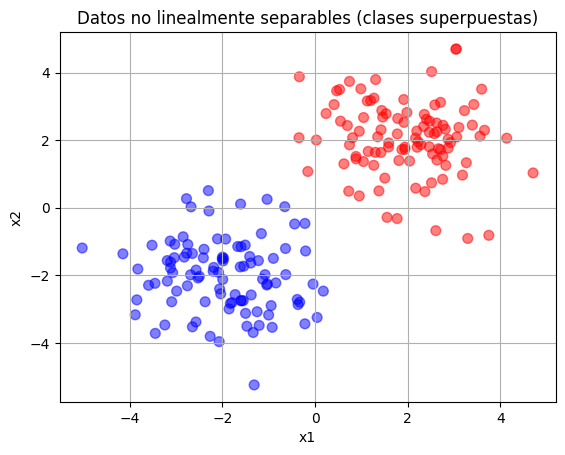

In [37]:
N = 100 # numero de datos
X_pos = np.random.randn(N, 2) + [2,2]
X_neg = np.random.randn(N, 2) + [-2,-2]

X = np.vstack((X_pos, X_neg))
Y = np.hstack((np.ones(N), -np.ones(N)))

Z = X*Y[:, np.newaxis]

plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='bwr', alpha=0.5)
plt.title("Datos no linealmente separables (clases superpuestas)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [18]:
beta = np.zeros(X.shape[1])
hist = [np.linalg.norm(beta)]

for i in range(1000):
    wrong = 0
    for zi in Z:
        if np.dot(beta, zi) <= 0:
            beta += zi
            wrong += 1
        hist.append(np.linalg.norm(beta))
    if wrong == 0:
        break
        

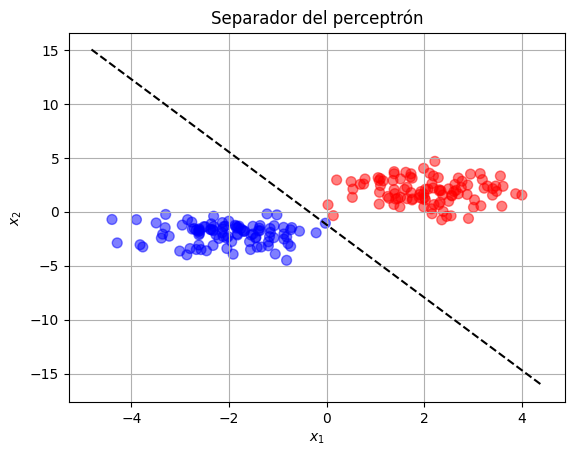

In [17]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='bwr', alpha=0.5)
x_vals = np.array(plt.gca().get_xlim())
y_vals = -(beta[0] * x_vals + 1) / beta[1]
plt.plot(x_vals, y_vals, '--k')
plt.title("Separador del perceptrón")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(True)
plt.show()

Text(0, 0.5, '$||\\beta||$')

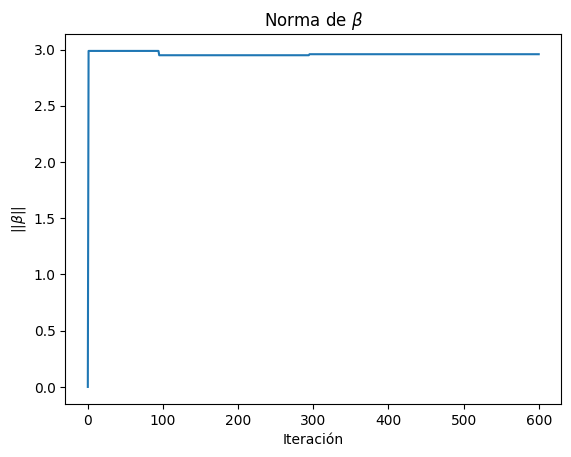

In [21]:
plt.plot(hist)
plt.title(r"Norma de $\beta$")
plt.xlabel("Iteración")
plt.ylabel(r"$||\beta||$")

## Datos no linealmente separables

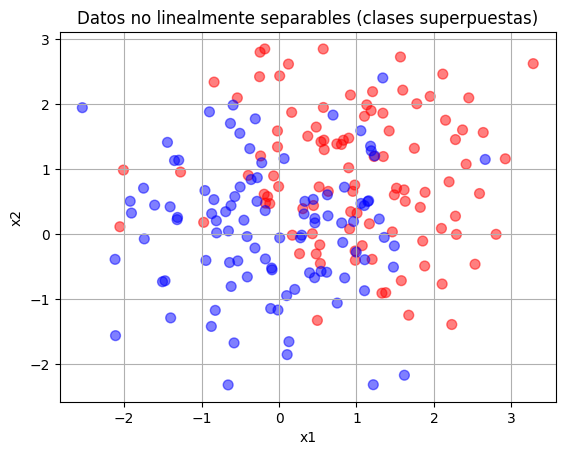

In [38]:
X_pos = np.random.randn(N, 2) + [1, 1]

# Clase -1: nube centrada en (0, 0)
X_neg = np.random.randn(N, 2) + [0, 0]

# Juntar datos
X = np.vstack((X_pos, X_neg))
Y = np.hstack((np.ones(N), -np.ones(N)))

# Añadir bias
X = np.hstack((X, np.ones((2*N, 1))))

# Calcular z_i = x_i * y_i
Z = X * Y[:, np.newaxis]

# Visualizar
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='bwr', alpha=0.5)
plt.title("Datos no linealmente separables (clases superpuestas)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [33]:
beta = np.zeros(X.shape[1])
hist = [np.linalg.norm(beta)]

for i in range(1000):
    wrong = 0
    for zi in Z:
        if np.dot(beta, zi) <= 0:
            beta += zi
            wrong += 1
        hist.append(np.linalg.norm(beta))
    if wrong == 0:
        break
        

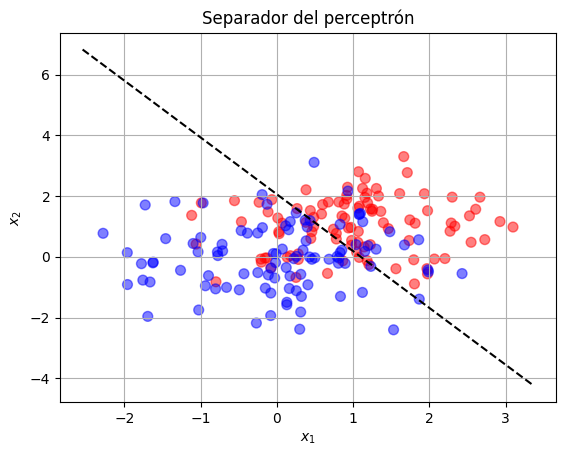

In [34]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap='bwr', alpha=0.5)
x_vals = np.array(plt.gca().get_xlim())
y_vals = -(beta[0] * x_vals + 1) / beta[1]
plt.plot(x_vals, y_vals, '--k')
plt.title("Separador del perceptrón")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.grid(True)
plt.show()

Text(0, 0.5, '$||\\beta||$')

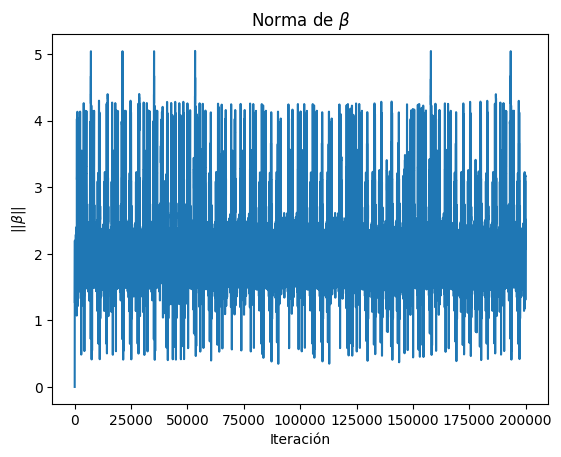

In [35]:
plt.plot(hist)
plt.title(r"Norma de $\beta$")
plt.xlabel("Iteración")
plt.ylabel(r"$||\beta||$")

# 2. Implementa un autoencoder en sklearn para visualizar los textos de inciso a) y b) en 2D y 3D. Compara los resultados con Isomap, T-SNE y PCA.

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
import string
import re

def preprocess(text, stemmer, stop_words):
    text = text.lower()
    text = re.sub(r'[\d]+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words and len(word) >= 2]
    return ' '.join(tokens)

stemmer = SnowballStemmer("english")  # Or "spanish" if your texts are in Spanish
stop_words = set(stopwords.words("english"))

renglones = []
y = []
with open("../../datos/capitulos_autor.txt", "r", encoding="utf-8") as f:
    for linea in f:
        partes = linea.strip().split(" | ")
        if len(partes) == 2:
            autor, texto = partes
            texto_procesado = preprocess(texto, stemmer, stop_words)
            renglones.append(texto_procesado)
            y.append(autor)

vectorizer = CountVectorizer(max_features=5000, min_df=1)
X = vectorizer.fit_transform(renglones)
X = X.toarray()
y = [1 if autor == "baum" else 0 for autor in y]  # 1 para Baum, 0 para Thompson

## 2D

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

n = 2

input_dim = X.shape[1]
inputs = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(inputs)
hidden = Dense(n, activation='linear')(encoded)
decoded = Dense(64, activation='relu')(hidden)
outputs = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32)

2025-05-20 12:48:09.226900: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-20 12:48:09.226927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-20 12:48:09.227730: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-20 12:48:09.232646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-20 12:48:09.933496: W tensorflow/compiler/tf2

Epoch 1/50


2025-05-20 12:48:12.112974: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-05-20 12:48:12.112997: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: nautilus
2025-05-20 12:48:12.113002: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: nautilus
2025-05-20 12:48:12.113112: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 535.230.2
2025-05-20 12:48:12.113126: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.230.2
2025-05-20 12:48:12.113130: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 535.230.2


12/12 [==============================] - 1s 7ms/step - loss: 0.9028
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.7655
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 0.7231
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.7090
Epoch 5/50
12/12 [==============================] - 0s 7ms/step - loss: 0.7032
Epoch 6/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6985
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6923
Epoch 8/50
12/12 [==============================] - 0s 8ms/step - loss: 0.6820
Epoch 9/50
12/12 [==============================] - 0s 6ms/step - loss: 0.6701
Epoch 10/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6612
Epoch 11/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6537
Epoch 12/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6491
Epoch 13/50
12/12 [==============================] - 0s 7ms/

12/12 [==============================] - 0s 1ms/step


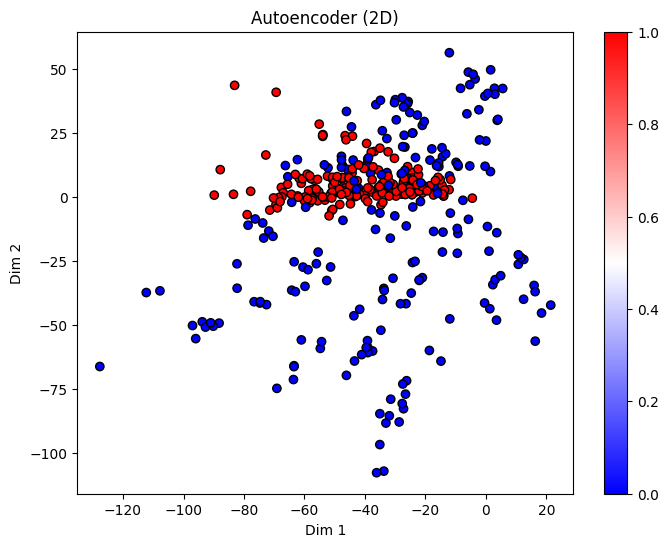

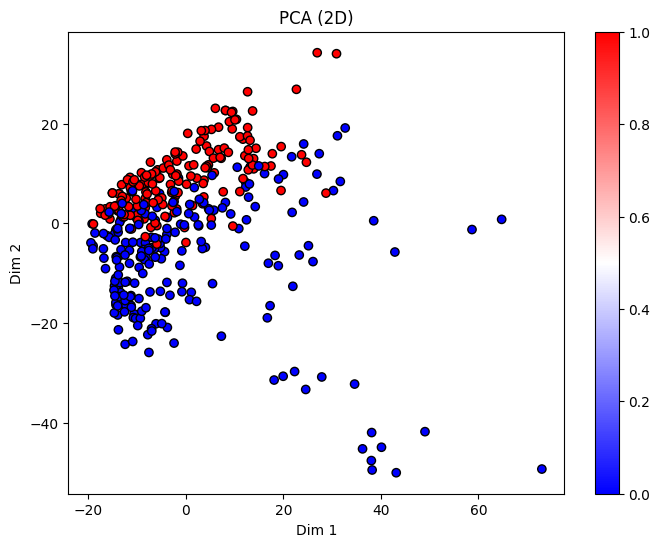

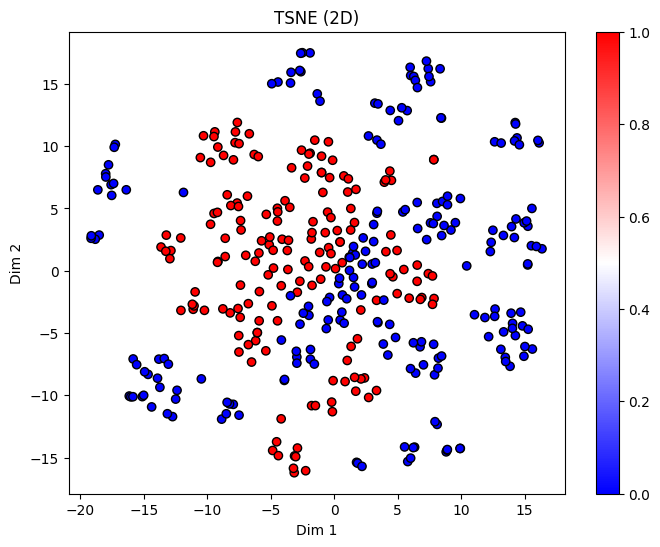

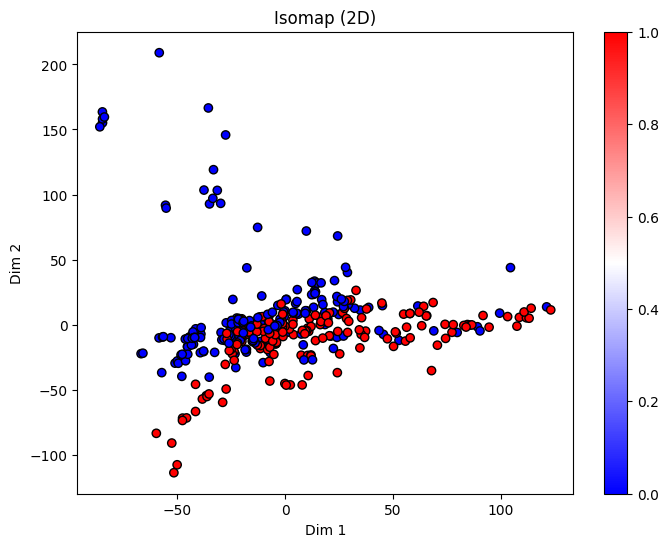

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap
from sklearn.decomposition import PCA

encoder = Model(inputs=inputs, outputs=hidden)
X_2d = encoder.predict(X)
X_pca = PCA(n_components=2).fit_transform(X)
X_tsne = TSNE(n_components=2).fit_transform(X)
X_isomap = Isomap(n_components=2).fit_transform(X)


plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Autoencoder (2D)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("PCA (2D)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("TSNE (2D)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Isomap (2D)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar()
plt.show()

## 3D

In [10]:
n = 3

input_dim = X.shape[1]
inputs = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(inputs)
hidden = Dense(n, activation='linear')(encoded)
decoded = Dense(64, activation='relu')(hidden)
outputs = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=32)

Epoch 1/50
12/12 [==============================] - 0s 7ms/step - loss: 0.9077
Epoch 2/50
12/12 [==============================] - 0s 7ms/step - loss: 0.7726
Epoch 3/50
12/12 [==============================] - 0s 7ms/step - loss: 0.7232
Epoch 4/50
12/12 [==============================] - 0s 7ms/step - loss: 0.7040
Epoch 5/50
12/12 [==============================] - 0s 9ms/step - loss: 0.6916
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 0.6776
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 0.6589
Epoch 8/50
12/12 [==============================] - 0s 7ms/step - loss: 0.6400
Epoch 9/50
12/12 [==============================] - 0s 9ms/step - loss: 0.6231
Epoch 10/50
12/12 [==============================] - 0s 8ms/step - loss: 0.6086
Epoch 11/50
12/12 [==============================] - 0s 7ms/step - loss: 0.5980
Epoch 12/50
12/12 [==============================] - 0s 7ms/step - loss: 0.5895
Epoch 13/50
12/12 [==============================

12/12 [==============================] - 0s 1ms/step


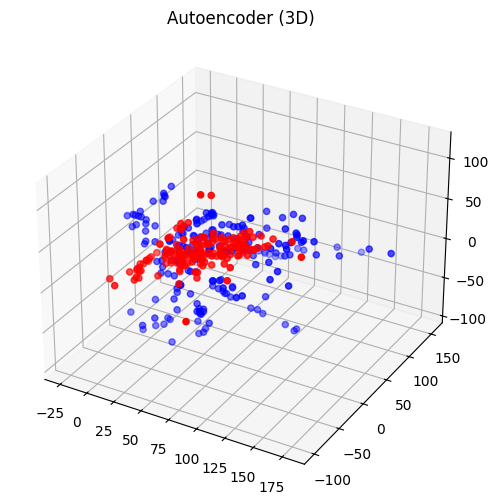

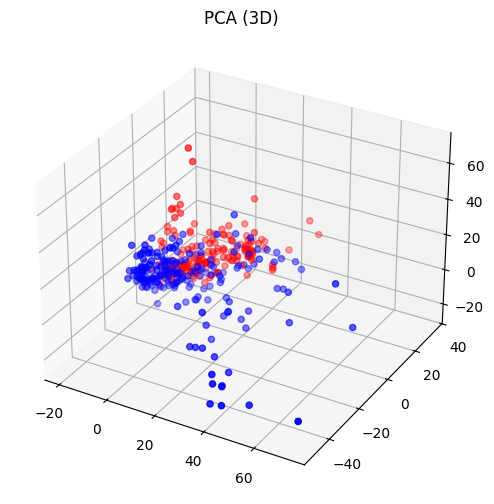

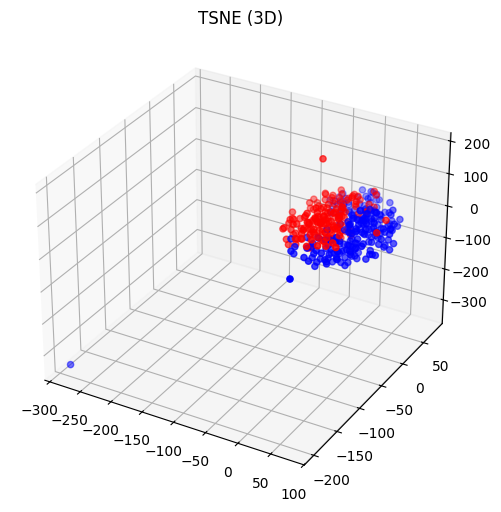

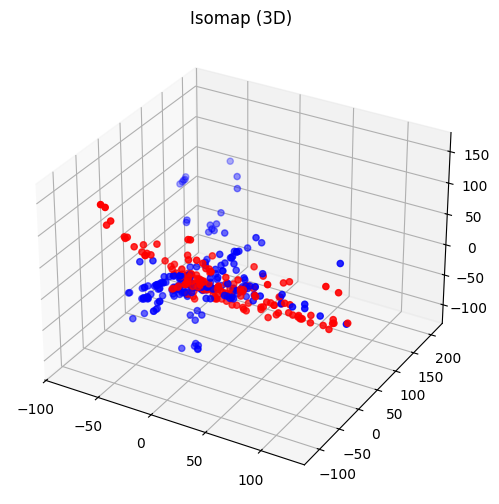

In [14]:
from mpl_toolkits.mplot3d import Axes3D

encoder = Model(inputs=inputs, outputs=hidden)
X_3d = encoder.predict(X)
X_pca = PCA(n_components=3).fit_transform(X)
X_tsne = TSNE(n_components=3).fit_transform(X)
X_isomap = Isomap(n_components=3).fit_transform(X)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y, cmap='bwr')
ax.set_title("Autoencoder (3D)")
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='bwr')
ax.set_title("PCA (3D)")
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y, cmap='bwr')
ax.set_title("TSNE (3D)")
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_isomap[:, 0], X_isomap[:, 1], X_isomap[:, 2], c=y, cmap='bwr')
ax.set_title("Isomap (3D)")
plt.show()